In [1]:
import pandas as pd
pd.options.display.max_columns = 500
df = pd.read_csv("data/train.csv")

In [2]:
df = df.drop("id", axis = 1)

print(df.shape)

df.head()

(30471, 291)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [3]:
### Прологарифмируем таргетную переменную, для оптимизации MSLE

import numpy as np

df = df.assign(log_price_doc=np.log1p(df["price_doc"]))
df = df.drop("price_doc", axis = 1)

In [4]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [5]:
numeric_columns = df.loc[:, df.dtypes!=np.object_].columns

df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_coun

In [6]:
numeric_columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'log_price_doc'],
      dtype='object', length=275)

In [7]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [8]:
df[numeric_columns].isna().sum()

full_sq               0
life_sq               0
floor                 0
max_floor             0
material              0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
log_price_doc         0
Length: 275, dtype: int64

In [9]:
### Корреляции вещественных признаков

df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_coun

In [10]:
### Фильтрация признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlation(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

print("Top absolute Correlations")
print(get_top_abs_correlation(df[numeric_columns], 50))

Top absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_preschool                    0_6_all                                  1.000000
children_school                       7_14_all                                 1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [11]:
### Удалим колонки, где корреляция > 0.9

def correlation(dataset, threshold):
    col_corr = set()
    # Оставляем только числовые столбцы
    numeric_dataset = dataset.select_dtypes(include=[np.number])
    corr_matrix = numeric_dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]

correlation(df, 0.9)

In [12]:
df.shape

(30471, 157)

In [13]:
numeric_columns = df.loc[:, df.dtypes!= np.object_].columns

In [14]:
### Посмотрим на квазиконстантные признаки
### Дисперсионный анализ 

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols]


,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


## Обработка категориальных признаков

In [15]:
### Посмотрим на категориальные колонки

categorial_columns = df.loc[:, df.dtypes==np.object_].columns

df.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [ ]:
### Преобразуем категориальные признаки

for  col in categorial_columns:
    if col != 'timestamp':

        ### Признаки с малым количеством уникальных значений закодируем через one-hot

        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis = 1)

        ### Признаки с большим количеством уникальных значений закодируем через mean target

        else:
            mean_target = df.groupby(col)["log_price_doc"].mean()
            df[col] = df[col].map(mean_target)

In [17]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,ID_railroad_station_walk,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,1,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,1.0,6.905893,1,0.274985,0.992631,1.422391,10.918587,1.422391,1,3.830951,5,1.305159,101,24.292406,1,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,2,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.

In [18]:
df.shape

(30471, 157)

In [19]:
df['timestamp'] = pd.to_datetime(df["timestamp"])

df["month"] = df["timestamp"].dt.month
df["year"] = df["timestamp"].dt.year

In [20]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,ID_railroad_station_walk,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,1,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,1.0,6.905893,1,0.274985,0.992631,1.422391,10.918587,1.422391,1,3.830951,5,1.305159,101,24.292406,1,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,False,False,False,False,False,False,False,False,False,False,False,False,False,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,2,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.

In [ ]:
### Отсортируем по timestamp

df = df.sort_values("timestamp")

df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,ID_railroad_station_walk,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,1,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,1.0,6.905893,1,0.274985,0.992631,1.422391,10.918587,1.422391,1,3.830951,5,1.305159,101,24.292406,1,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,False,False,False,False,False,False,False,False,False,False,False,False,False,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,2,0.936700,0.147754,0.273345,0.550690,0.065321,0.966479,1.

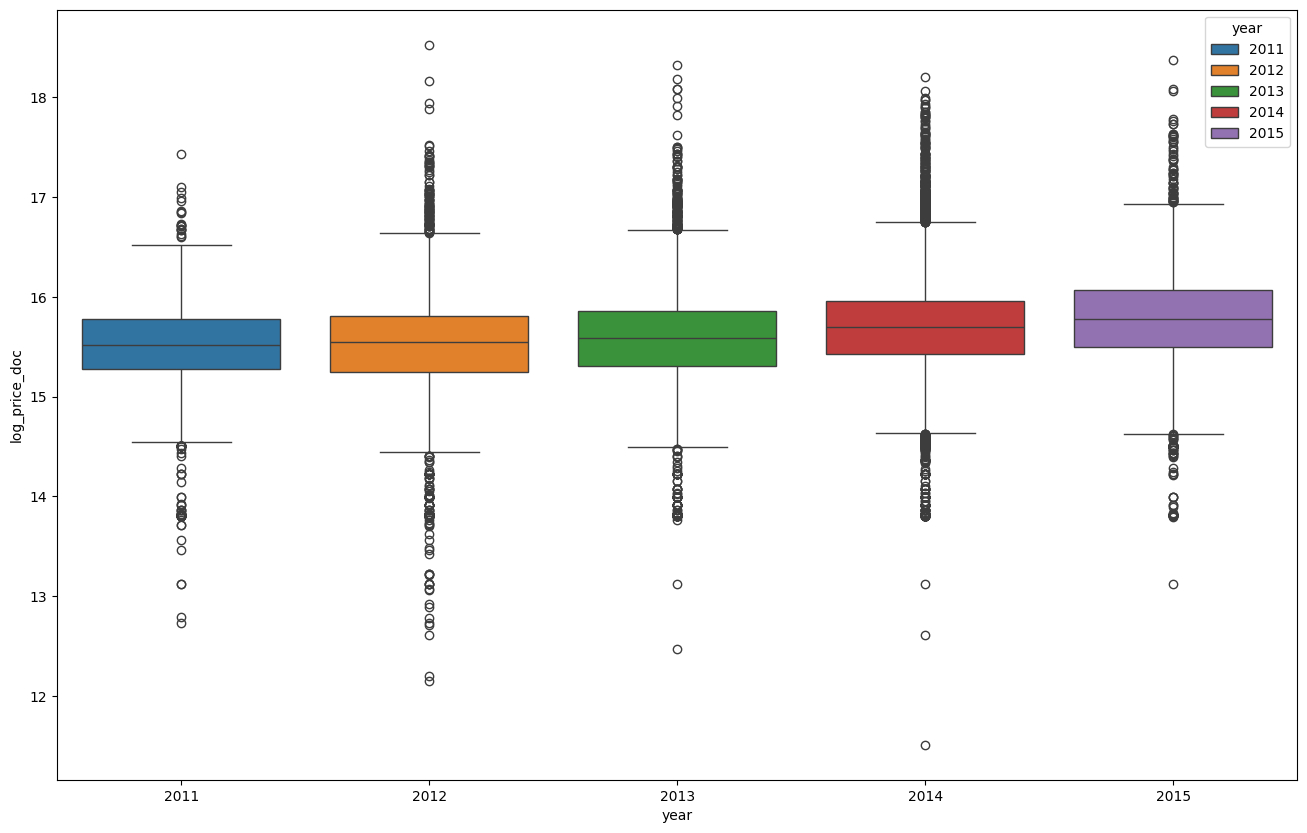

In [24]:
### Распределение таргета по годам

from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))

sns.boxplot(df, x = df["year"].astype("category"), y = df["log_price_doc"], hue=df["year"].astype("category"))
plt.show()

In [25]:
### Закодируем год через one
one_hot = pd.get_dummies(df['year'], prefix = 'year', drop_first=True)
df = pd.concat((df.drop("year", axis = 1), one_hot), axis=1)


In [26]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,ID_railroad_station_walk,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year_2012,year_2013,year_2014,year_2015
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,1,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,1.0,6.905893,1,0.274985,0.992631,1.422391,10.918587,1.422391,1,3.830951,5,1.305159,101,24.292406,1,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,False,False,False,False,False,False,False,False,False,False,False,False,False,8,False,False,False,False
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,2,0.

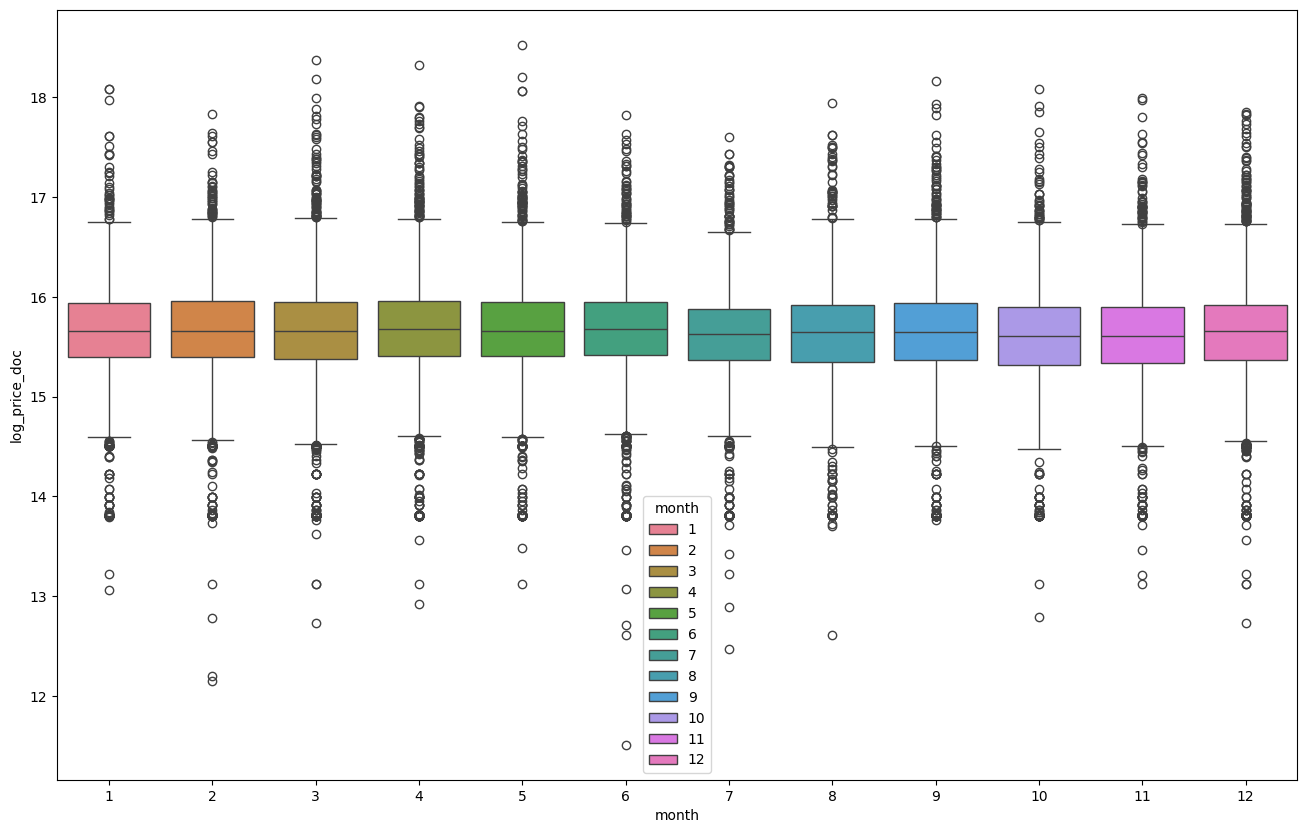

In [27]:
### Распределение таргета с месяцами

plt.figure(figsize=(16, 10))

sns.boxplot(data=df, 
            x = df["month"].astype("category"),
            y = df["log_price_doc"],
            hue = df["month"].astype("category"))

plt.show()

In [28]:
one_hot = pd.get_dummies(df["month"], prefix="month", drop_first=True)
df = pd.concat(((df.drop("month", axis = 1)), one_hot), axis = 1)

In [29]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,ID_railroad_station_walk,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,year_2012,year_2013,year_2014,year_2015,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,1,2.590241,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,1.0,6.905893,1,0.274985,0.992631,1.422391,10.918587,1.422391,1,3.830951,5,1.305159,101,24.292406,1,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,0,6,1,14.27,9,171420,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.8648

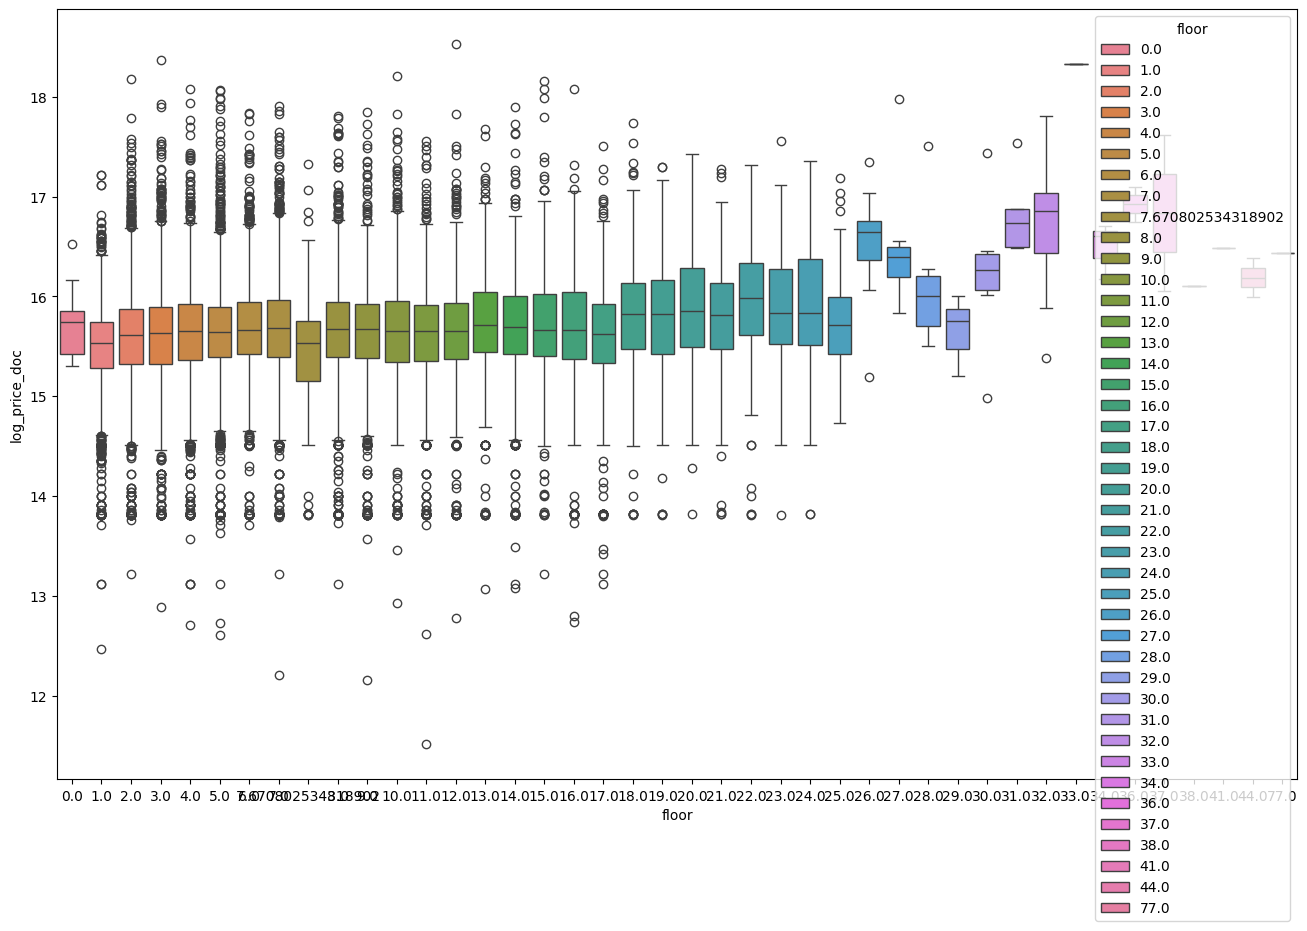

In [30]:
### Распределение таргета по этажу

fig = plt.figure(figsize=(16,10))

sns.boxplot(data = df,
            x = df["floor"].astype("category"),
            y = df["log_price_doc"],
            hue = df["floor"].astype("category"))

plt.show()

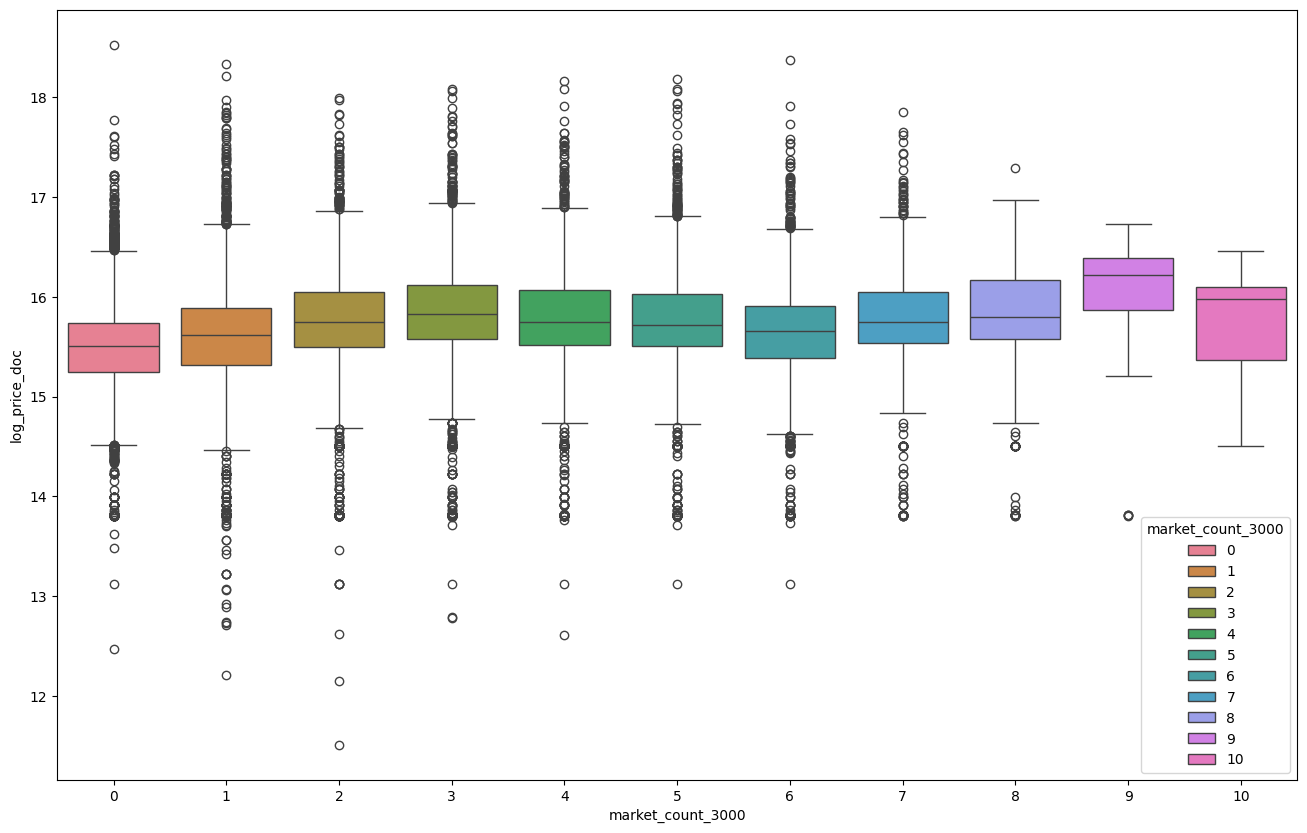

In [31]:
### Распределение таргета по количеству магазинов в радиусе 3 км

fig = plt.figure(figsize=(16,10))

sns.boxplot(data = df,
            x = df["market_count_3000"].astype("category"),
            y = df["log_price_doc"],
            hue = df["market_count_3000"].astype("category"))

plt.show()

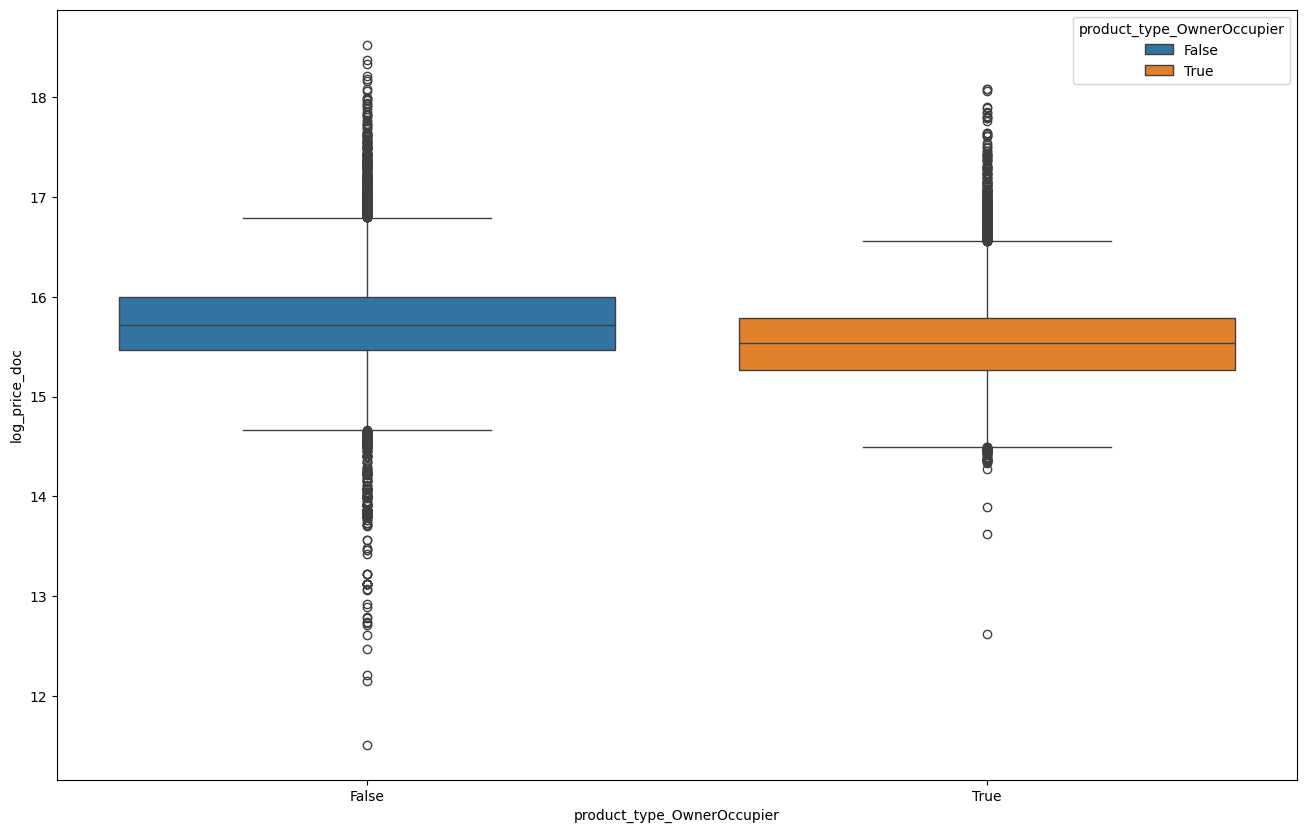

In [32]:
### Распределение таргета по типу недвижимости

fig = plt.figure(figsize=(16,10))

sns.boxplot(data = df,
            x = df["product_type_OwnerOccupier"].astype("category"),
            y = df["log_price_doc"],
            hue = df["product_type_OwnerOccupier"].astype("category"))

plt.show()

In [33]:
### Убираем timestamp

df = df.drop("timestamp", axis = 1)

In [34]:
### Отделим таргеты от объектов

X = df.drop("log_price_doc", axis = 1)
Y = df["log_price_doc"]

## Модели для бейзлайна

In [36]:
### Разделим выборку на валидацию и тест

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [39]:
### Функция cross_validate

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_result = cross_validate(model, X, Y, cv = splitter, scoring="neg_mean_squared_error", return_train_score=True)

cv_result

print(f"Среднее MSLE на трейне: {-np.mean(cv_result["train_score"]).round(3)}")
print(f"Среднее MSLE на тесте: {-np.mean(cv_result["test_score"]).round(3)}")

Среднее MSLE на трейне: 0.281
Среднее MSLE на тесте: 0.38


In [40]:
### Lasso - регуляризации

from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result = cross_validate(model_lasso, X, Y, cv = splitter, scoring="neg_mean_squared_error", return_train_score=True)

print(f"Сдреднее MSLE на трейне для Lasso: {-np.mean(cv_result["train_score"]).round(3)}")
print(f"Сдреднее MSLE на тесте для Lasso: {-np.mean(cv_result["test_score"]).round(3)}")

Сдреднее MSLE на трейне для Lasso: 0.33
Сдреднее MSLE на тесте для Lasso: 0.36


In [42]:
### Добавим масштабирование данных

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()),
                 ('Lasso', Lasso(max_iter=100000))])

pipe.fit(X, Y)

print(pipe.predict(X.head(1)))

cv_result = cross_validate(pipe, X, Y, cv = splitter, scoring="neg_mean_squared_error", return_train_score=True)

print(f"Сдреднее MSLE на трейне для Lasso: {-np.mean(cv_result["train_score"]).round(3)}")
print(f"Сдреднее MSLE на тесте для Lasso: {-np.mean(cv_result["test_score"]).round(3)}")

[15.60948317]
Сдреднее MSLE на трейне для Lasso: 0.382
Сдреднее MSLE на тесте для Lasso: 0.355


In [43]:
alphas = np.linspace(start = 0.01, stop = 1, num = 30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [44]:
### Подбор коэффициентов регуляризации

from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

search = GridSearchCV(pipe, param_grid, cv=splitter, scoring = "neg_mean_squared_error")

search.fit(X, Y)

print(f"Best parameter (CV score = {search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score = -0.30296):
{'Lasso__alpha': np.float64(0.11241379310344828)}


In [ ]:
### Убедимся в правильности работы

pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso',
                 Lasso(alpha=np.float64(0.11241379310344828),
                       max_iter=100000))])

In [46]:
cv_result_pipe = cross_validate(pipe, X, Y,
                                cv = splitter,
                                scoring = "neg_mean_squared_error",
                                return_train_score=True)


print(f"Сдреднее MSLE на трейне для Lasso: {-np.mean(cv_result_pipe["train_score"]).round(3)}")
print(f"Сдреднее MSLE на тесте для Lasso: {-np.mean(cv_result_pipe["test_score"]).round(3)}")

Сдреднее MSLE на трейне для Lasso: 0.333
Сдреднее MSLE на тесте для Lasso: 0.303
